In [1]:
import pandas as pd
import numpy as mp

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import collections
from PIL import Image
#following imports are needed for ploting the tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from matplotlib import pyplot as plt
import seaborn as sns
#Installing graphviz is a very hectic thing, go through some youtube tutorial for successfully installing graphvig and pydotplus
import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [14]:

data = pd.read_csv(r"dataset.csv")

In [15]:
data.head(3)

,Depressed,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,Yes,1102,1,2,1,1,2,94,3,2,...,3,1,80,0,8,0,1,6,4,0
1,No,279,8,1,1,2,3,61,2,2,...,4,4,80,1,10,3,3,10,7,1
2,Yes,1373,2,2,1,4,4,92,2,1,...,3,2,80,0,7,3,3,0,0,0


In [4]:
features = data.columns
# display
features

Index(['Depressed', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [5]:
features = [x for x in features if x != 'Depressed'] #This will take all the x or the inputs to the features without "Attrition"
# display                                                   #because "Attrition is Y or output"
features

['DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'YearsWithCurrManager',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion']

In [6]:
train, test = train_test_split(data, test_size = 0.25)
print(len(data))
print(len(train))
print(len(test))

1470
1102
368


In [7]:
dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [8]:
x_train = train[features]
y_train = train["Depressed"]

x_test = test[features]
y_test = test["Depressed"]

In [9]:
dt = dt.fit(x_train, y_train)

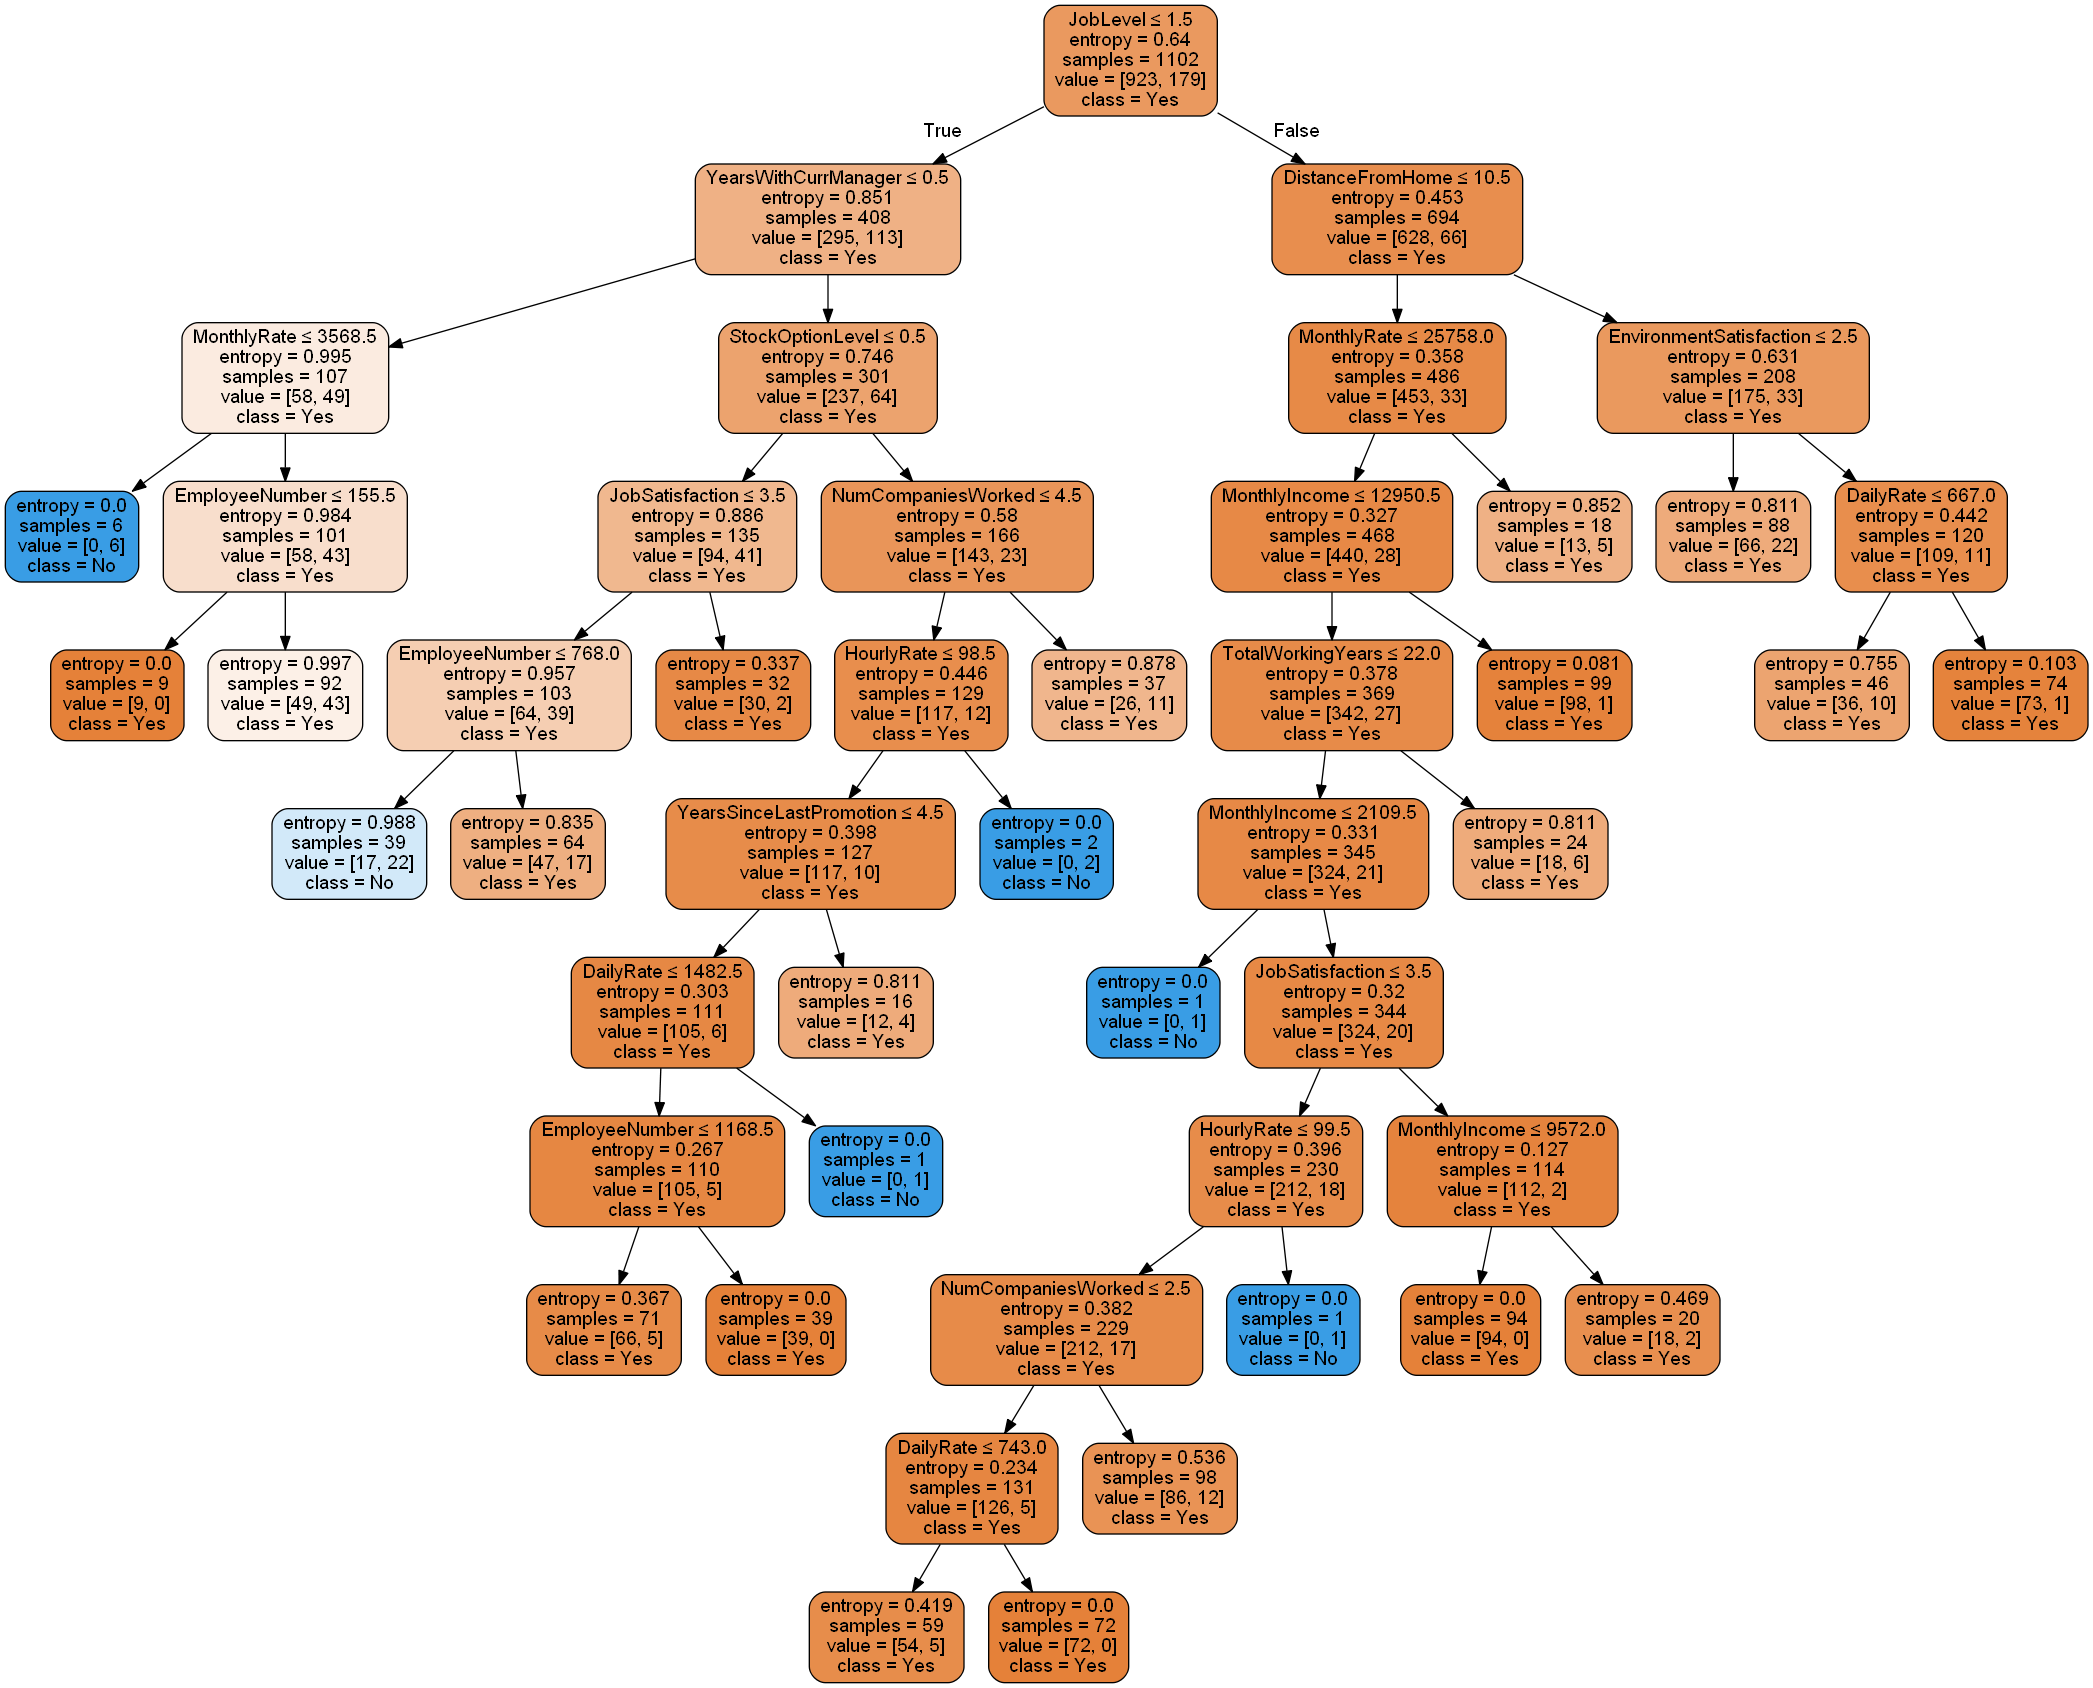

In [10]:
#If you cant not install the graphvig properly then the following code will not run... Just comment out this block and the other
#code part should work just fine.
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names=data.Depressed,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
y_pred = dt.predict(x_test)

In [12]:
#display
y_pred #These are the predicted values. 

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No'

In [13]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

Accuracy using desicion Tree:  82.9 %
